In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch

import sys
sys.path.insert(0,'../testproblems/darcy')
from ManufacturedSolutionsDarcy import *

import sys
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from NGO import NGO

In [3]:
%load_ext autoreload
%autoreload 2

In [37]:
from NGO import NGO

logdir = '../../../nnlogs'
map_location = 'cpu'

sublogdir = 'N_epochs'
model = loadmodelfromlabel(model=NGO, label='20000', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

### Manufactured solutions test dataset

In [48]:
l = 0.01

N_samples = 1

dataset = MFSetDarcy(N_samples=N_samples, d=2, l_min=l, l_max=l)
theta = dataset.theta
f = dataset.f
etat = dataset.etat
etab = dataset.etab
gl = dataset.gl
gr = dataset.gr
u = dataset.u

0
0
0
0
0
0
0
0
0
0
0
0
0
0


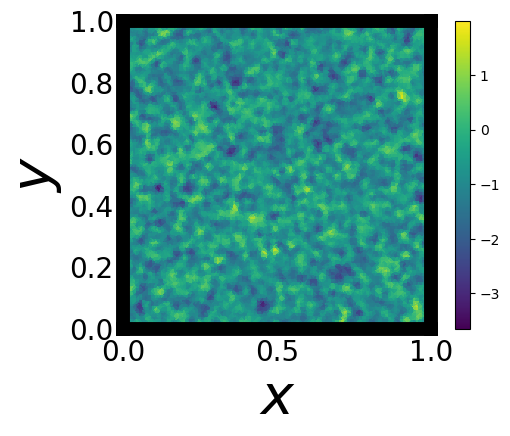

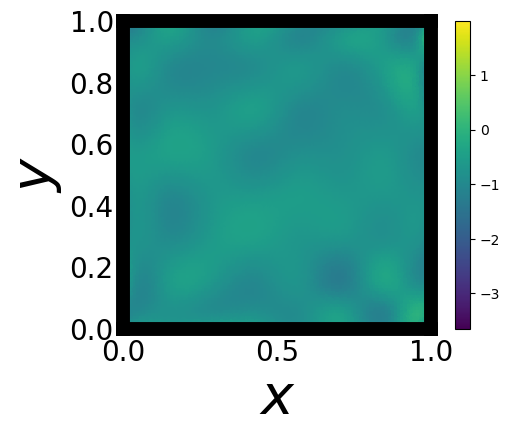

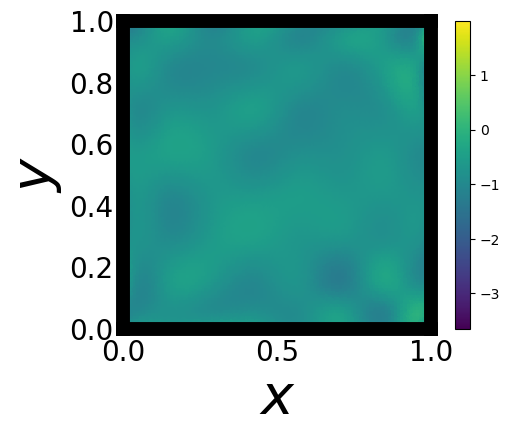

In [49]:
i = 0

Q = 100
X, Y = np.mgrid[0:1:Q*1j, 0:1:Q*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot1 = ax.tripcolor(x[:,0], x[:,1], u[i](x), vmin=np.amin(u[i](x)), vmax=np.amax(u[i](x)))
#ax.set_title(r'$u(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u.svg", bbox_inches='tight', transparent=True)

u_hat = model.simforward(theta, f, etab, etat, gl, gr, x, u)[i]

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot1 = ax.tripcolor(x[:,0], x[:,1], u_hat, vmin=np.amin(u[i](x)), vmax=np.amax(u[i](x)))
#ax.set_title(r'$u(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u_NGO.svg", bbox_inches='tight', transparent=True)

model.hparams['modeltype'] = 'projection'
u_hat = model.simforward(theta, f, etab, etat, gl, gr, x, u)[i]

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot2 = ax.tripcolor(x[:,0], x[:,1], u_hat, vmin=np.amin(u[i](x)), vmax=np.amax(u[i](x)))
#ax.set_title(r'$\hat{u}(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u_proj.svg", bbox_inches='tight', transparent=True)